In [256]:
import modele as mod
import sections as s
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import plotly.express as px
from tqdm import tqdm

## Caractéristiques de la route

In [257]:
N = 100                        #Taille de la route (en mailles)   
U_init = np.zeros(N)           #Discrétisation de la route
#U_init[0:30] = 100
h = 0.1                         #Taille de chaque maille (en km)
I = 1                          #Nombre de lignes
nom = "Section solo test"

## Caractéristiques de la simulation

In [258]:
p_c = 100.                     #Densité critique (en vh/km)
p_max = 150.                   #Densité max (en vh/km)
V_0 = 50.                      #Vitesse souhaitée (en km/h)                         
flux_entrant = 800            #Flux de véhicules entrant (en vh/h)
fl_fix = flux_entrant
#flux_t_entrant = 0            #Flux de temps d'attente
#T = 1.4/3600                   #Temps de réaction
dt =  0.99*(h/V_0)             #CFL

In [259]:
def plus(route):  
    route.flux_entrant+=500


def moins(route):
    if route.flux_entrant - 500>=0:
        route.flux_entrant-=500

## Définitions des objets et def

In [260]:
#Définition de la route
route = s.section(p_max = p_max, V_0 = V_0, I = I, U = U_init, flux_entrant=flux_entrant, p_c = p_c, nom = nom, sortie=True)

init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0


In [261]:
#Définition du modèle
model = mod.model([route], intersections= None, carrefours= None, dt = dt, h = h)

In [262]:
#Variation du flux d'entrée
def variation(route):
    sigma = np.random.normal(0,0.1)
    if int(route.flux_entrant + sigma*fl_fix)>0:
        route.flux_entrant = route.flux_entrant + sigma*fl_fix

    

# La suite à ne pas executer si on veut lancer MONTE CARLO !!!!

## Visualisation

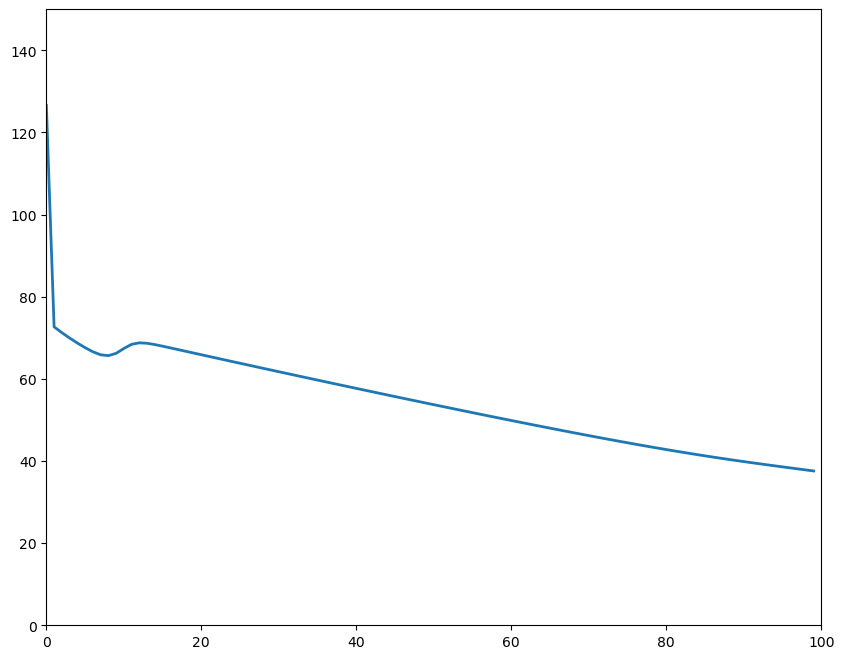

In [253]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(0, N), ylim=(0, 150))
line, = plt.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    model.resoudre()
    variation(route)
    x = np.linspace(0, N-1, N)
    y = route.U
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=500, interval=50, blit=True)

anim.save('densite_evolution.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

## Monte Carlo

In [268]:
def simulation(T):
    # T correspond au nombre de pas de temps qu'on veut pour notre simulation
    pho_global = np.zeros((T,N))

    for i in range(T):
        model.resoudre()
        variation(route)
        pho_global[i] = route.U

    pho_global

In [276]:
def MC_sim(M, simulator, T, N):
    # M correspond au nombre d'iter pour MC
    #simulator correspond au modèle à simuler
    stockage = np.zeros((M,T,N))
    for m in range(M):
        stockage[m] = simulator()

In [277]:
np.shape(MC_sim(100, simulation(500), 500, N))

TypeError: 'numpy.ndarray' object is not callable